## Jorge P. Rodríguez, 2023

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
plt.style.use('classic')
import matplotlib.colors as colors
import matplotlib.colorbar as chi
import math

In [4]:
df = pd.read_csv('./data/routing_tev_Ntimearea_bylon.csv')
df.head()

,ilon,2020-01-01T00:00:00.000000000_N,2020-01-01T00:00:00.000000000_t,2020-01-01T00:00:00.000000000_A,2020-02-01T00:00:00.000000000_N,2020-02-01T00:00:00.000000000_t,2020-02-01T00:00:00.000000000_A,2020-03-01T00:00:00.000000000_N,2020-03-01T00:00:00.000000000_t,2020-03-01T00:00:00.000000000_A,...,2022-01-01T00:00:00.000000000_A,2022-02-01T00:00:00.000000000_N,2022-02-01T00:00:00.000000000_t,2022-02-01T00:00:00.000000000_A,2022-03-01T00:00:00.000000000_N,2022-03-01T00:00:00.000000000_t,2022-03-01T00:00:00.000000000_A,2022-04-01T00:00:00.000000000_N,2022-04-01T00:00:00.000000000_t,2022-04-01T00:00:00.000000000_A
0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.401503,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,147.610809,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,2,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.005553,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,3,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.614709,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,4,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.218014,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


In [5]:
#cuts 
ilon1 = 10*(-90+180)
ilon2 = 10*(150+180)

In [6]:
utimes = list(df.columns)
utimes.remove('ilon')
utimes2 = []
utimes3 = []
for elem in utimes:
    utimes2.append(pd.to_datetime(elem[:-4]))
    utimes3.append(elem[:-2])
utimes2 = np.unique(utimes2)
utimes3 = np.unique(utimes3)
utimes2.sort()
utimes3.sort()
print(len(utimes2))
print(utimes2)
print(utimes3)

28
[Timestamp('2020-01-01 00:00:00') Timestamp('2020-02-01 00:00:00')
 Timestamp('2020-03-01 00:00:00') Timestamp('2020-04-01 00:00:00')
 Timestamp('2020-05-01 00:00:00') Timestamp('2020-06-01 00:00:00')
 Timestamp('2020-07-01 00:00:00') Timestamp('2020-08-01 00:00:00')
 Timestamp('2020-09-01 00:00:00') Timestamp('2020-10-01 00:00:00')
 Timestamp('2020-11-01 00:00:00') Timestamp('2020-12-01 00:00:00')
 Timestamp('2021-01-01 00:00:00') Timestamp('2021-02-01 00:00:00')
 Timestamp('2021-03-01 00:00:00') Timestamp('2021-04-01 00:00:00')
 Timestamp('2021-05-01 00:00:00') Timestamp('2021-06-01 00:00:00')
 Timestamp('2021-07-01 00:00:00') Timestamp('2021-08-01 00:00:00')
 Timestamp('2021-09-01 00:00:00') Timestamp('2021-10-01 00:00:00')
 Timestamp('2021-11-01 00:00:00') Timestamp('2021-12-01 00:00:00')
 Timestamp('2022-01-01 00:00:00') Timestamp('2022-02-01 00:00:00')
 Timestamp('2022-03-01 00:00:00') Timestamp('2022-04-01 00:00:00')]
['2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.0000

In [7]:
wseries = []
eseries = []
samp = df[df['ilon'] == ilon1]
samp1 = df[df['ilon'] == ilon2]
dl = 6371.*0.1*np.pi/180.
for elem in utimes3:
    wseries.append(dl*samp[f'{elem}_N'].iloc[0])
    eseries.append(dl*samp1[f'{elem}_N'].iloc[0])


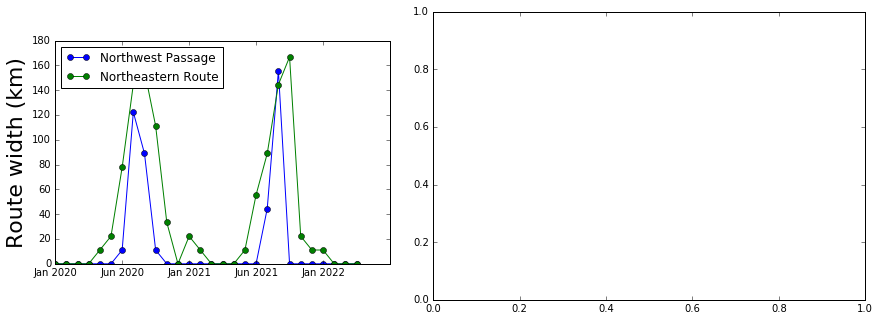

In [8]:
fig = plt.figure()
fig.set_facecolor('w')
plt.plot(wseries,'o-',label='Northwest Passage')
plt.plot(eseries,'o-',label='Northeastern Route')
plt.xticks([0,6,12,18,24],
           ['Jan 2020','Jun 2020',
            'Jan 2021','Jun 2021',
            'Jan 2022'])
plt.ylabel(r'Route width (km)',size=22)
plt.legend(loc=0)


In [9]:
dfice = pd.read_csv('./data/icearea_byzones_timeev.csv',parse_dates=['Time'])
dfice.head()

,Time,Baffin-Area-km^2,CanadianArchipelago-Area-km^2,Beaufort-Area-km^2,East-Siberian-Area-km^2,Barents-Area-km^2,Kara-Area-km^2
0,2010-01-01,731808.124,725652.880,919320.121,1264761.614,390745.695,782025.033
1,2010-02-01,817384.110,737522.776,926676.567,1280044.311,466298.568,848057.017
2,2010-03-01,925220.040,733623.941,926308.537,1285450.976,631909.464,864513.419
3,2010-04-01,877956.517,718422.058,915972.806,1290238.212,588371.486,840263.909
4,2010-05-01,663974.829,686894.418,873825.550,1243308.085,223876.251,743912.542


In [10]:
dfice.columns

Index(['Time', 'Baffin-Area-km^2', 'CanadianArchipelago-Area-km^2',
       'Beaufort-Area-km^2', 'East-Siberian-Area-km^2', 'Barents-Area-km^2',
       'Kara-Area-km^2'],
      dtype='object')

In [11]:
dates = []
for i in range(1,13):
    dates.append(pd.to_datetime(f'2020-{i}-01'))
    dates.append(pd.to_datetime(f'2021-{i}-01'))
for i in range(1,5):
    dates.append(pd.to_datetime(f'2022-{i}-01'))
dates.sort()

In [12]:
print(dates,len(dates))

[Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-01 00:00:00'), Timestamp('2020-07-01 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-06-01 00:00:00'), Timestamp('2021-07-01 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-09-01 00:00:00'), Timestamp('2021-10-01 00:00:00'), Timestamp('2021-11-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-04-01 00:00:00')] 28


In [13]:
canseries = [ ]
beaseries = []
sibseries = []
karaseries = []
barenseries = []
baffinseries = []
for d in dates:
    samp = dfice[dfice['Time'] == d]
    canseries.append(samp['CanadianArchipelago-Area-km^2'].iloc[0])
    beaseries.append(samp['Beaufort-Area-km^2'].iloc[0])
    sibseries.append(samp['East-Siberian-Area-km^2'].iloc[0])
    barenseries.append(samp['Barents-Area-km^2'].iloc[0])
    karaseries.append(samp['Kara-Area-km^2'].iloc[0])
    baffinseries.append(samp['Baffin-Area-km^2'].iloc[0])


In [14]:
print(canseries)

[743011.553, 744317.277, 741830.554, 732783.7829999999, 716976.115, 560432.415, 429493.975, 236002.27399999998, 223050.85100000002, 386061.196, 703774.215, 737056.079, 748528.063, 748267.7059999999, 744540.177, 743983.6059999999, 717352.5859999999, 567632.186, 462383.4, 305856.692, 283673.418, 288434.13899999997, 585424.322, 715884.68, 728060.01, 730158.1290000001, 727697.416, 736539.792]


In [15]:
print(len(eseries))

28


In [16]:
print(eseries)

[0.0, 0.0, 0.0, 0.0, 11.119492664455874, 22.23898532891175, 77.83644865119112, 144.55340463792638, 155.67289730238224, 111.19492664455875, 33.35847799336762, 0.0, 22.23898532891175, 11.119492664455874, 0.0, 0.0, 0.0, 11.119492664455874, 55.597463322279374, 88.955941315647, 144.55340463792638, 166.79238996683813, 22.23898532891175, 11.119492664455874, 11.119492664455874, 0.0, 0.0, 0.0]


/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


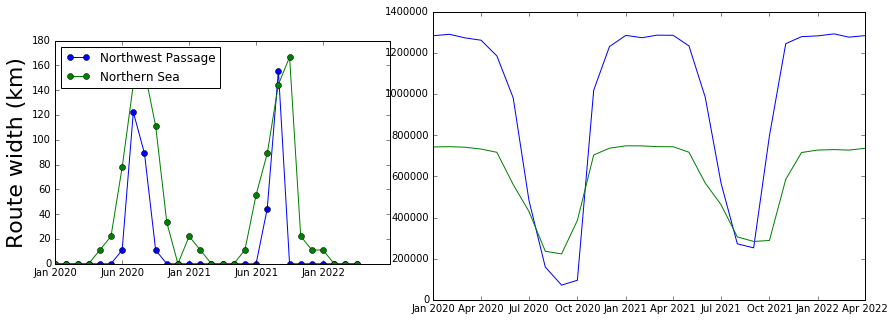

In [17]:
fig = plt.figure()
plt.plot(wseries,'o-',label='Northwest Passage')
plt.plot(eseries,'o-',label='Northern Sea')
plt.xticks([0,6,12,18,24],
           ['Jan 2020','Jun 2020',
            'Jan 2021','Jun 2021',
            'Jan 2022'])
plt.ylabel(r'Route width (km)',size=22)
plt.legend(loc=0)
ax = fig.add_axes([1,0,1,1])
plt.plot(dates,sibseries)
plt.plot(dates,canseries)


In [18]:
ldates = [pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-07-01'),
         pd.to_datetime('2020-10-01'),pd.to_datetime('2021-01-01'),pd.to_datetime('2021-04-01'),
          pd.to_datetime('2021-07-01'),
         pd.to_datetime('2021-10-01'),pd.to_datetime('2022-01-01'),pd.to_datetime('2022-04-01')]

In [19]:
wseries2 = []
beaseries2 = []
baffinseries2 = []
canseries2 = []
for ix,val in enumerate(wseries):
    if val != 0.0:
        wseries2.append(val)
        beaseries2.append(beaseries[ix])
        baffinseries2.append(baffinseries[ix])
        canseries2.append(canseries[ix])

In [20]:
eseries2 = []
sibseries2 = []
barenseries2 = []
karaseries2 = []
for ix,val in enumerate(eseries):
    if val != 0:
        eseries2.append(val)
        sibseries2.append(sibseries[ix])
        barenseries2.append(barenseries[ix])
        karaseries2.append(karaseries[ix])

In [21]:
print(np.corrcoef(baffinseries2,wseries2))
print(np.corrcoef(beaseries2,wseries2))
print(np.corrcoef(canseries2,wseries2))

[[ 1.         -0.72253419]
 [-0.72253419  1.        ]]
[[ 1.         -0.90201228]
 [-0.90201228  1.        ]]
[[ 1.         -0.77824874]
 [-0.77824874  1.        ]]


In [22]:
print(np.corrcoef(sibseries2,eseries2))
print(np.corrcoef(karaseries2,eseries2))
print(np.corrcoef(barenseries2,eseries2))

[[ 1.         -0.83749775]
 [-0.83749775  1.        ]]
[[ 1.         -0.84171242]
 [-0.84171242  1.        ]]
[[ 1.         -0.66580103]
 [-0.66580103  1.        ]]


Text(0, 0.5, 'I')

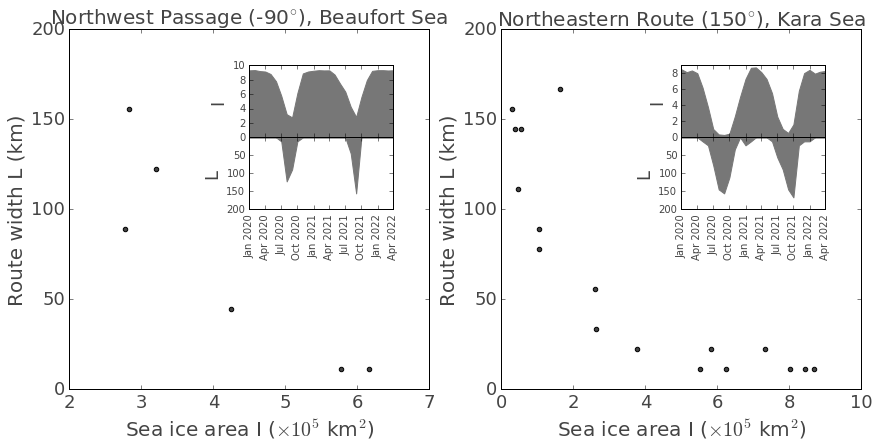

In [24]:
fig = plt.figure(figsize=(10,5))
fig.set_facecolor('w')
ax = plt.gca()
ax.set_position([0,0,0.5,1])
plt.scatter([elem/1e5 for elem in beaseries2],wseries2,c='#444444')
# plt.plot(icex,pwseries2,'--',color='#444444')
ax.set_title(r'Northwest Passage (-90$^{\circ}$), Beaufort Sea',size=20,color='#444444')
plt.ylim(0,200)
plt.xlim(2,7)
plt.xlabel(r'Sea ice area I ($\times 10^5$ km$^2$)',size=20,color='#444444')
plt.ylabel(r'Route width L (km)',size=20,color='#444444')
plt.yticks(size=18,color='#444444')
plt.xticks(size=18,color='#444444')
ax1 = fig.add_axes([0.6,0,0.5,1])
plt.sca(ax1)
plt.scatter([elem/1e5 for elem in karaseries2],eseries2,c='#444444')
ax1.set_title(r'Northeastern Route (150$^{\circ}$), Kara Sea',size=20,color='#444444')
plt.xlabel(r'Sea ice area I ($\times 10^5$ km$^2$)',size=20,color='#444444')
plt.ylabel(r'Route width L (km)',size=20,color='#444444')

plt.ylim(0,200)
plt.xlim(0,10)
plt.yticks(size=18,color='#444444')
plt.xticks(size=18,color='#444444')

ax2b = fig.add_axes([0.25,0.5,0.2,0.2])
plt.fill_between(dates,0,wseries,color='#777777')
plt.ylabel('L',size=18,color='#444444')
ax2b.invert_yaxis()
plt.xticks(rotation=90,color='#444444')
plt.yticks([50,100,150,200],color='#444444')
ax2t = fig.add_axes([0.25,0.7,0.2,0.2])
plt.fill_between(dates,0,[elem/1e5 for elem in beaseries],color='#777777')
plt.xticks(ldates,[])
plt.yticks(color='#444444')

plt.ylabel('I',size=18,color='#444444')
ax3b = fig.add_axes([0.85,0.5,0.2,0.2])
plt.fill_between(dates,0,eseries,color='#777777')
plt.ylabel('L',size=18,color='#444444')
ax3b.invert_yaxis()
plt.xticks(rotation=90,color='#444444')
plt.yticks([50,100,150,200],color='#444444')

ax3t = fig.add_axes([0.85,0.7,0.2,0.2])
plt.fill_between(dates,0,[elem/1e5 for elem in karaseries],color='#777777')
plt.xticks(ldates,[])
plt.yticks([0,2,4,6,8],color='#444444')

plt.ylabel('I',size=18,color='#444444')
# fig.savefig('corr_ice_transit_v2.png',bbox_inches='tight',dpi=300)

In [25]:
#make the regressions
lwseries2 = [np.log(elem) for elem in wseries2]
m,b = np.polyfit(beaseries2,lwseries2,1)
print(m,b)

-7.676076218951297e-06 7.025052795460816


In [26]:
plwseries2 = []
for elem in beaseries2:
    plwseries2.append(m*elem+b)

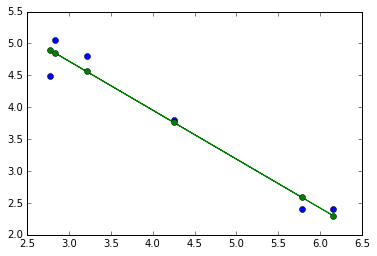

In [27]:
plt.plot([elem/1e5 for elem in beaseries2],lwseries2,'o')
plt.plot([elem/1e5 for elem in beaseries2],plwseries2,'o-')

In [28]:
icex = np.linspace(2,6.5,30)

In [29]:
pwseries2 = list(map(lambda x:np.exp(b)*np.exp(m*x),[elem*1e5 for elem in icex]))

In [30]:
print(pwseries2)

[242.2178557757497, 215.018919974029, 190.87418554972885, 169.44069253846519, 150.41399236480194, 133.5238233518355, 118.5302718330359, 105.22036433747954, 93.40504244272068, 82.91647732509112, 73.60568586239263, 65.34041442729941, 58.00326031215729, 51.490004101263196, 45.70812930307665, 40.575508214720045, 36.01923535234236, 31.97459187699743, 28.384126306392123, 25.196838454623485, 22.36745500830927, 19.855786449150212, 17.626156188435203, 15.646893804723092, 13.889885186477306, 12.330173189728262, 10.945603138369183, 9.716508131652418, 8.625429688887301, 7.656869763282556]


(0, 200)

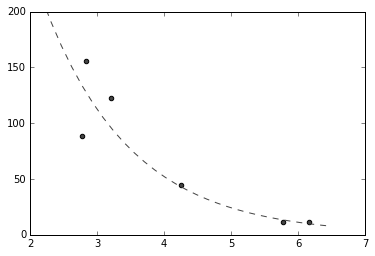

In [31]:
plt.plot(icex,pwseries2,'--',color='#444444')
plt.scatter([elem/1e5 for elem in beaseries2],wseries2,c='#444444')
plt.xlim(2,7)
plt.ylim(0,200)

In [32]:
eseriesfit = []
karaseriesfit = []
for ix,elem in enumerate(karaseries2):
    if elem < 6.e5:
        eseriesfit.append(eseries2[ix])
        karaseriesfit.append(karaseries2[ix])

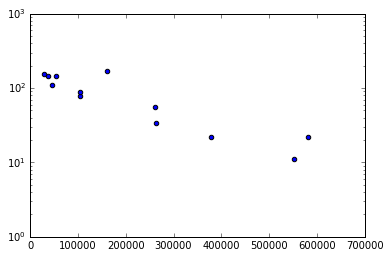

In [33]:
plt.scatter(karaseriesfit,eseriesfit)
plt.yscale('log')

In [34]:
leseriesfit = [np.log(elem) for elem in eseriesfit]
me,be = np.polyfit(karaseriesfit,leseriesfit,1)
print(me,be)

-4.289023214883793e-06 5.070083489053241


In [35]:
eicex = np.linspace(0,6,30)

In [36]:
peseries2 = list(map(lambda x:np.exp(be)*np.exp(me*x),[elem*1e5 for elem in eicex]))

(0, 200)

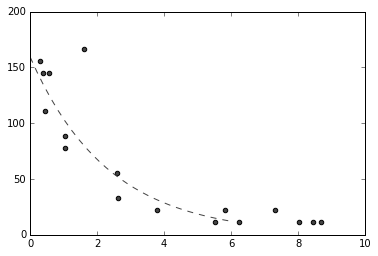

In [37]:
plt.plot(eicex,peseries2,'--',color='#444444')
plt.scatter([elem/1e5 for elem in karaseries2],eseries2,c='#444444')
plt.xlim(0,10)
plt.ylim(0,200)

In [38]:
print(eseries2)

[11.119492664455874, 22.23898532891175, 77.83644865119112, 144.55340463792638, 155.67289730238224, 111.19492664455875, 33.35847799336762, 22.23898532891175, 11.119492664455874, 11.119492664455874, 55.597463322279374, 88.955941315647, 144.55340463792638, 166.79238996683813, 22.23898532891175, 11.119492664455874, 11.119492664455874]


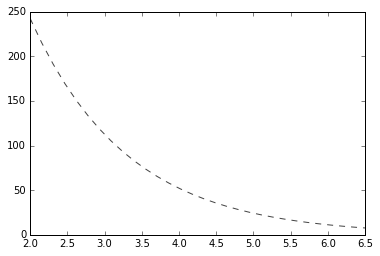

In [39]:
plt.plot(icex,pwseries2,'--',color='#444444')

In [40]:
leseries2 = [np.log(elem -11)for elem in eseries2]
me,be = np.polyfit(karaseries2,leseries2,1)
print(me,be)

-8.442797660161453e-06 5.348317396814732


In [41]:
peseries3 = list(map(lambda x:11+np.exp(be)*np.exp(me*x),[elem*1e5 for elem in eicex]))

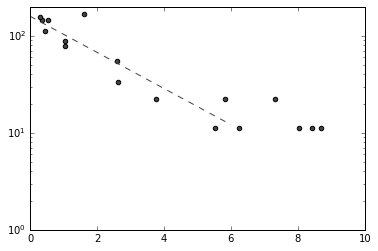

In [42]:
plt.scatter([elem/1e5 for elem in karaseries2],eseries2,c='#444444')
plt.plot(eicex,peseries2,'--',color='#444444')
plt.ylim(1,200)
plt.xlim(0,10)
plt.yscale('log')

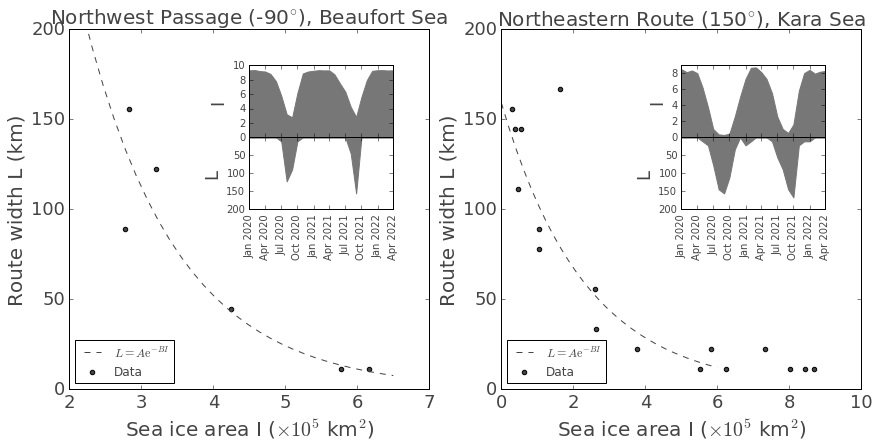

In [44]:
fig = plt.figure(figsize=(10,5))
fig.set_facecolor('w')
ax = plt.gca()
ax.set_position([0,0,0.5,1])
plt.scatter([elem/1e5 for elem in beaseries2],wseries2,c='#444444',label='Data')

plt.plot(icex,pwseries2,'--',color='#444444',label=r'$L=A\mathrm{e}^{-BI}$')


ax.set_title(r'Northwest Passage (-90$^{\circ}$), Beaufort Sea',size=20,color='#444444')
l0 = plt.legend(loc=3,scatterpoints=1)
for elem in l0.get_texts():
    elem.set_color('#444444')
plt.ylim(0,200)
plt.xlim(2,7)
plt.xlabel(r'Sea ice area I ($\times 10^5$ km$^2$)',size=20,color='#444444')
plt.ylabel(r'Route width L (km)',size=20,color='#444444')
plt.yticks(size=18,color='#444444')
plt.xticks(size=18,color='#444444')
ax1 = fig.add_axes([0.6,0,0.5,1])
plt.sca(ax1)
plt.scatter([elem/1e5 for elem in karaseries2],eseries2,c='#444444',label='Data')
plt.plot(eicex,peseries2,'--',color='#444444',label=r'$L=A\mathrm{e}^{-BI}$')
ax1.set_title(r'Northeastern Route (150$^{\circ}$), Kara Sea',size=20,color='#444444')
plt.xlabel(r'Sea ice area I ($\times 10^5$ km$^2$)',size=20,color='#444444')
plt.ylabel(r'Route width L (km)',size=20,color='#444444')
l1 = plt.legend(loc=3,scatterpoints=1)
for elem in l1.get_texts():
    elem.set_color('#444444')

plt.ylim(0,200)
plt.xlim(0,10)
plt.yticks(size=18,color='#444444')
plt.xticks(size=18,color='#444444')

ax2b = fig.add_axes([0.25,0.5,0.2,0.2])
plt.fill_between(dates,0,wseries,color='#777777')
plt.ylabel('L',size=18,color='#444444')
ax2b.invert_yaxis()
plt.xticks(rotation=90,color='#444444')
plt.yticks([50,100,150,200],color='#444444')
ax2t = fig.add_axes([0.25,0.7,0.2,0.2])
plt.fill_between(dates,0,[elem/1e5 for elem in beaseries],color='#777777')
plt.xticks(ldates,[])
plt.yticks(color='#444444')

plt.ylabel('I',size=18,color='#444444')
ax3b = fig.add_axes([0.85,0.5,0.2,0.2])
plt.fill_between(dates,0,eseries,color='#777777')
plt.ylabel('L',size=18,color='#444444')
ax3b.invert_yaxis()
plt.xticks(rotation=90,color='#444444')
plt.yticks([50,100,150,200],color='#444444')

ax3t = fig.add_axes([0.85,0.7,0.2,0.2])
plt.fill_between(dates,0,[elem/1e5 for elem in karaseries],color='#777777')
plt.xticks(ldates,[])
plt.yticks([0,2,4,6,8],color='#444444')

plt.ylabel('I',size=18,color='#444444')
fig.savefig('fig6.png',bbox_inches='tight',dpi=300)
fig.savefig('fig6.pdf',bbox_inches='tight',dpi=300);